# Praxisübung: Regularisierung und Hyperparametersuche

*In den folgenden Aufgaben werden Sie mehrere Modelle trainieren, wobei jeder Trainingslauf --- je nach Anzahl der Features und Anzahl der Datenpunkte --- eine gewisse Zeit benötigt. Um die Modellentwicklung zu beschleunigen ist es hilfreich, zunächst eine zufällig ausgewählte Teilmenge des Datensatzes zu betrachten (z.B. 10000 Punkte), die Sie sich mittels `DataFrame.sample(10000)` erzeugen.*

## ✏ Aufgabe 1
Wenden Sie Ridge Regression und Lasso für das Wohnungsbeispiel aus der letzten Woche an. Benutzen Sie dazu die vorverarbeiteten Daten in der Datei `immo_data_preprocessed`, die in ILIAS bereitgestellt sind. Des weiteren finden Sie weiter unten die Methode `print_evaluation`, mit der unterschiedliche Performance-Metriken berechnet und ausgegeben werden.

1. Skalieren Sie die Features mit dem `StandardScaler` aus `scikit-learn`. Das Skalieren sollte nach dem Aufteilen in Trainings- und Testset passieren. Schauen Sie sich dazu die Dokumentation unter https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html an.

[Ridge](#Ridge)


3. Trainieren Sie Modelle mit $\ell_2$- und mit $\ell_1$-Regularisierung (Ridge Regression und Lasso). Schauen Sie in die Dokumentation https://scikit-learn.org/stable/modules/linear_model.html, um die geeigneten Methoden dafür zu finden. Die API Doku für die linearen Modelle finden Sie hier: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model.

[Ridge](#Ridge)

[Lasso](#Lasso)


5. Beide Methoden haben einen Parameter `alpha`. Wie ist der Wert jeweils zu interpretieren (siehe Dokumentation)?

-> Der Wert Alpha ist der vorfaktor im Regulationsterm. Je Höher dieser ist, desto aggresiver ist die "bestrafung" hoher Koeffizienten in der Loss Funktion
    
7. Vergleichen Sie Modelle aus der vorherigen Teilaufgabe ($R^2$ bzw.\ Fehler auf den Trainings- bzw. Testdaten) für verschiedene Werte von `alpha`. Wie können Sie einen möglichst "guten" Wert für den Parameter finden?

   -> zufällige alphas testen

   -> [Grid Search](#GridSearch)
    
9. Beobachten Sie bei der Modellauswertung für die verschiedenen $\ell_2$- bzw. $\ell_1$-regularisierten Modelle zusätzlich die Anzahl der Koeffizienten, die ungleich Null sind. Was beobachten Sie?

    -> je aggresiver reguliert wird, desto höher wird die anzahl der Koeffizienten gleich 0


# Ridge

In [ ]:
# Ridge 
from flows.aufgabe1 import train_model_flow


state = await train_model_flow()

state = await train_model_flow(scale=True)

state = await train_model_flow(scale=True, alpha=8)

# Lasso

In [ ]:
# Lasso 
state = await train_model_flow(method="Lasso")

state = await train_model_flow(method="Lasso", scale=True)

state = await train_model_flow(method="Lasso", scale=True, alpha=1)

# GridSearch

In [ ]:
from flows.aufgabe1 import grid_search

interval = (1,10,20)
results_df = await grid_search(interval=interval, scale=True, sample=10000, method="Ridge")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# RMSE für Testdaten
plt.subplot(1, 2, 1)
plt.plot(results_df['Alpha'], results_df['RMSE Test'], marker='o', label=results_df['Model'].iloc[0])
plt.xlabel('Alpha')
plt.ylabel('RMSE Test')
plt.title('Test RMSE vs Alpha')
plt.legend()

# R² für Testdaten
plt.subplot(1, 2, 2)
plt.plot(results_df['Alpha'], results_df['R2 Test'], marker='o', label=results_df['Model'].iloc[0])
plt.xlabel('Alpha')
plt.ylabel('R² Test')
plt.title('Test R² vs Alpha')
plt.legend()

plt.tight_layout()
plt.show()

## ✏ Aufgabe 2
Führen Sie eine Hyperparametersuche mit Kreuzvalidierung durch, indem Sie den Algorithmus aus der Vorlesung für das Immoscout Beispiel implementieren.
Sie können sich herantasten, indem Sie zuerst die einfache Hyperparametersuche (ohne Kreuzvalidierung) implementieren und dann Schritt 2 des Algorithmus ersetzen.
Benutzen Sie die KFold Klasse aus scikit-learn um sich die Datensätze für die Kreuzvalidierung zu erzeugen: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html. Nachfolgende finden Sie ein Beispiel, wie die Klasse `KFold` funktioniert.

In [ ]:
from flows.aufgabe2 import cross_validation
import matplotlib.pyplot as plt
import pandas as pd


interval=(1,100,20)
average_performance, best_alpha = await cross_validation(interval=interval, scale=True, sample=10000, method="Ridge", n_splits=5)

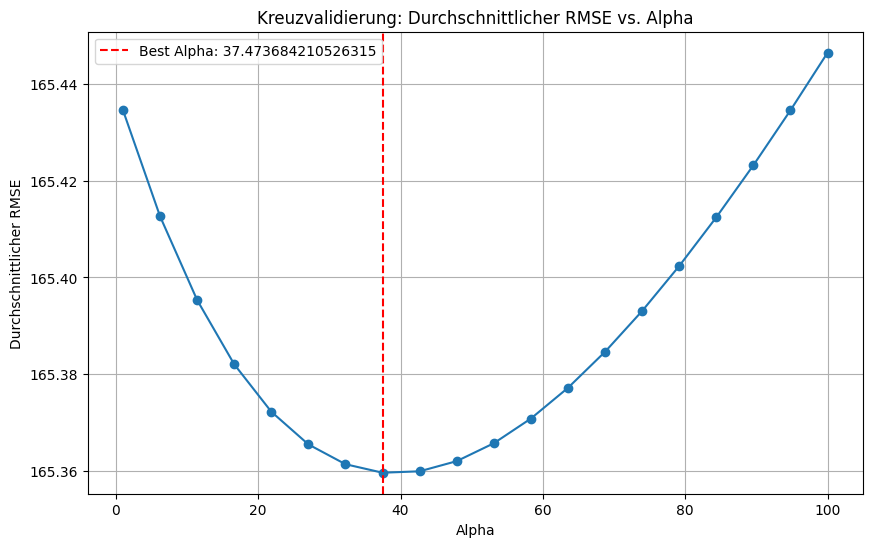

In [7]:
performance_df = pd.DataFrame(list(average_performance.items()), columns=['Alpha', 'RMSE'])

# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(performance_df['Alpha'], performance_df['RMSE'], marker='o', linestyle='-')
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Best Alpha: {best_alpha}')
plt.title('Kreuzvalidierung: Durchschnittlicher RMSE vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Durchschnittlicher RMSE')
plt.legend()
plt.grid()
plt.show()

## ✏ Aufgabe 3 🤯
Führen Sie eine nested-Cross Validation durch, um eine bessere Schätzung des Testfehlers zu erhalten. D.h. anstatt *ein* Trainings- und Testset zu erzeugen (vor der Hyperparametersuche), erzeugen Sie $k$ Testsets. Für jedes dieser $k$ Trainings-/Testset Paare führen Sie nun die Hyperparametersuche mit Kreuzvalidierung wie in der vorherigen Aufgabe durch. Als Resultat erhalten Sie eine Schätzung des Testfehlers durch Mittelung der $k$ Testfehler und $k$ Modelle.

In [ ]:
from flows.aufgabe3 import nested_cross_validation

result = await nested_cross_validation(sample=10000)

In [6]:
# Durchschnittlicher Testfehler
average_test_error = result["average_test_error"]
test_errors = result["test_errors"]
best_alphas = result["best_alphas"]

In [ ]:
# Visualisierung
import matplotlib.pyplot as plt

# Plot der Testfehler
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(test_errors) + 1), test_errors, marker='o', linestyle='-', color='b')
plt.title('Testfehler (RMSE) über Outer Folds')
plt.xlabel('Outer Fold')
plt.ylabel('Testfehler (RMSE)')
plt.xticks(range(1, len(test_errors) + 1))
plt.axhline(y=average_test_error, color='r', linestyle='--', label='Durchschnittlicher RMSE')
plt.legend()
plt.grid()
plt.show()

# Histogramm der besten Alpha-Werte
plt.figure(figsize=(10, 6))
plt.hist(best_alphas, bins=10, color='g', alpha=0.7)
plt.title('Verteilung der besten Alpha-Werte')
plt.xlabel('Alpha')
plt.ylabel('Anzahl')
plt.grid()
plt.show()